<a href="https://colab.research.google.com/github/swapnilgupta14/project_2/blob/main/AlvinnVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
30*32*4+30*4 #Plus bias units - but let's be honest, who really cares about counting those?

3960

# New Section

In [ ]:
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style()
#commit 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
import h5py as h5
%matplotlib inline
import matplotlib.pyplot as plt
data = h5.File('/content/drive/MyDrive/Work - Project/project 2/track_data_2.h5', 'r')

In [ ]:
# fig = figure(0, (20, 16))
# for i in range(9):
#     fig.add_subplot(3, 3, i+1)
#     imshow(data['images'][i*100, :, :]); grid(0)
#     title(str(round(data['angles'][i*100], 3)) + '$^{\circ}$', fontsize = 20)

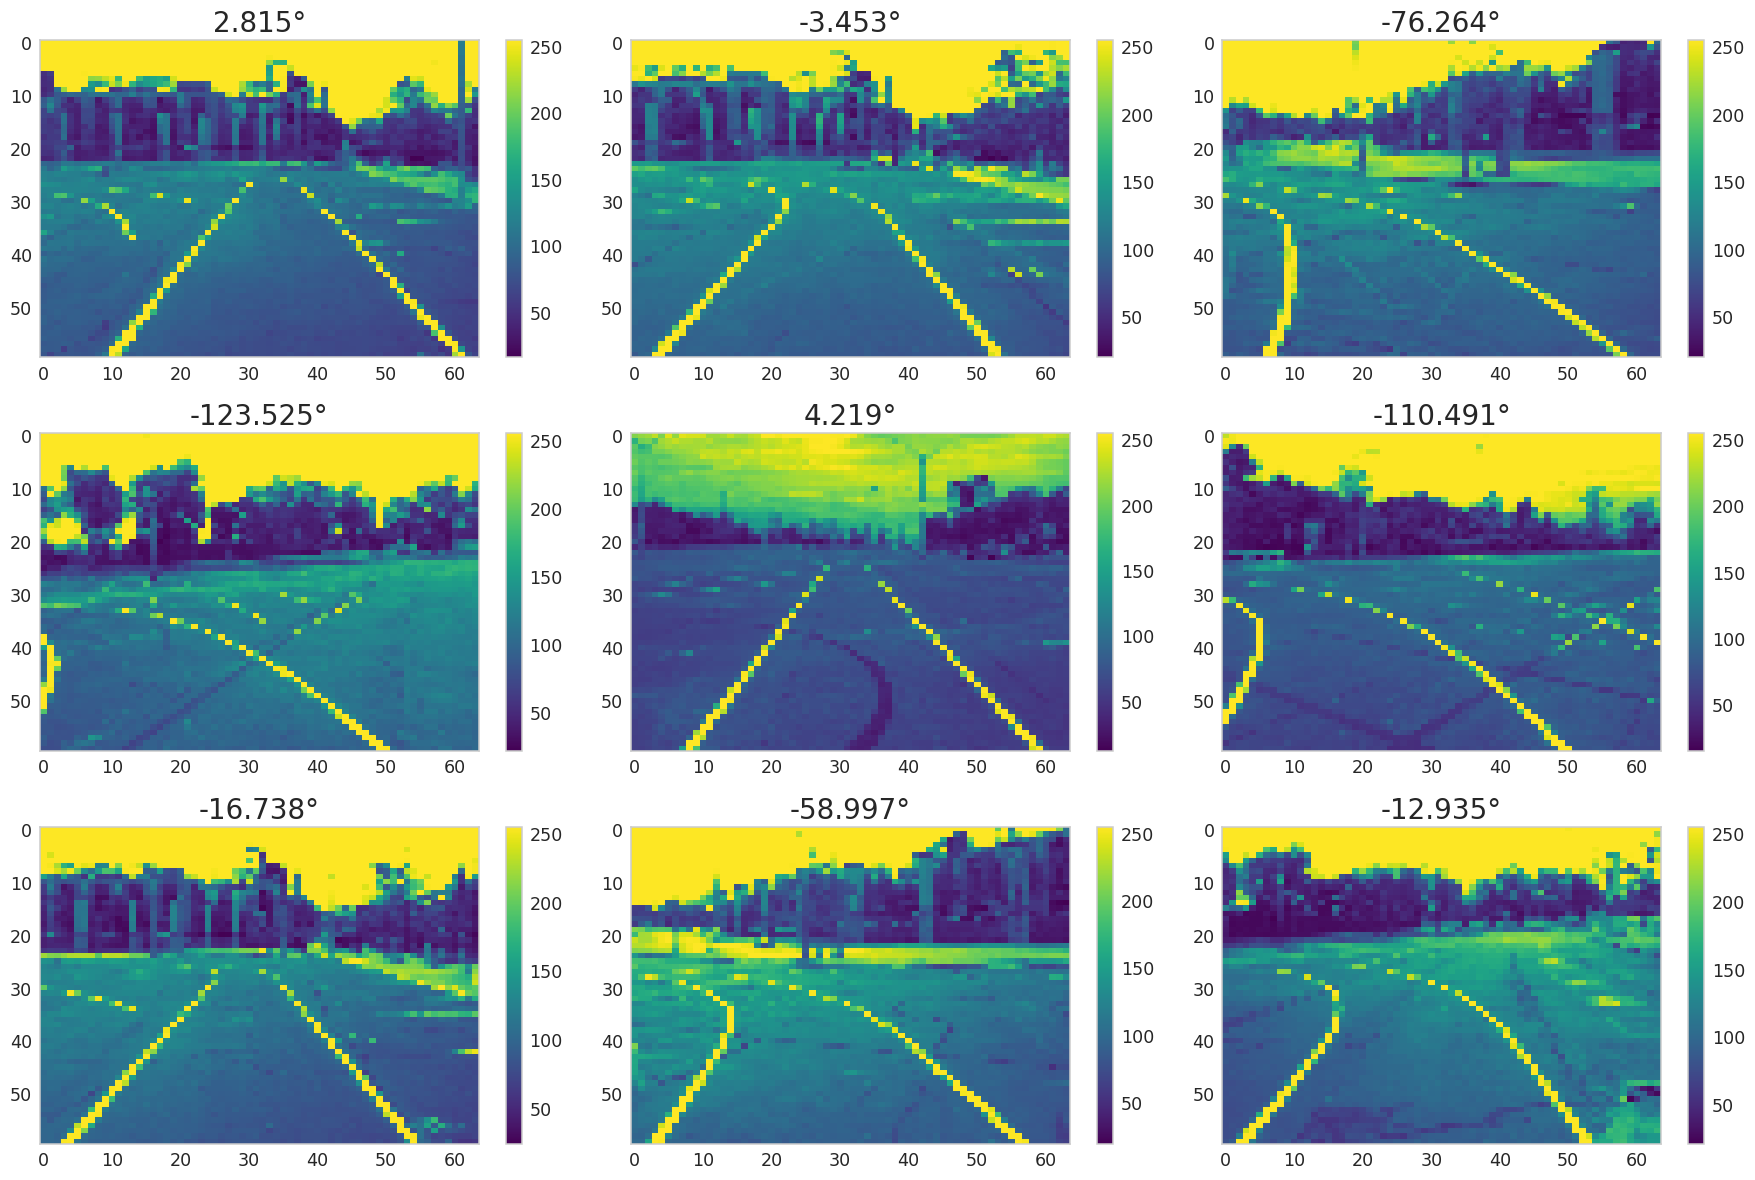

In [ ]:
num_images = 9
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
colormap = 'viridis'
for i in range(num_images):
    ax = axes[i // 3, i % 3]
    img = data['images'][i * 100, :, :]
    cax = ax.imshow(img, cmap=colormap, aspect='auto')
    plt.colorbar(cax, ax=ax)
    ax.grid(False)
    angle = round(data['angles'][i * 100], 3)
    ax.set_title(f'{angle}°', fontsize=20)
plt.tight_layout()
plt.show()

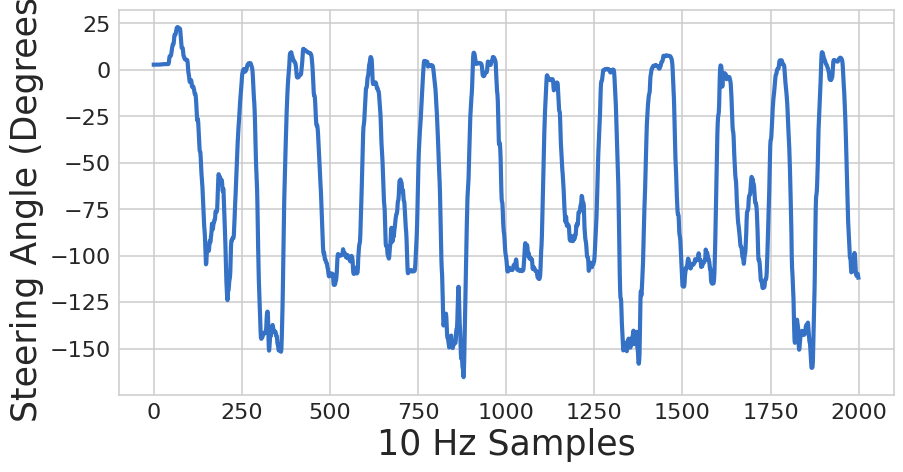

In [ ]:
# Extract 'angles' dataset as a numpy array
angles = data['angles'][:]
fig = plt.figure(0, figsize=(10, 5))
samples = range(len(angles))
# Plot the steering angles with a linewidth of 3
plt.plot(samples, angles, linewidth=3)
plt.ylabel('Steering Angle (Degrees)', fontsize=15)
plt.xlabel('10 Hz Samples', fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

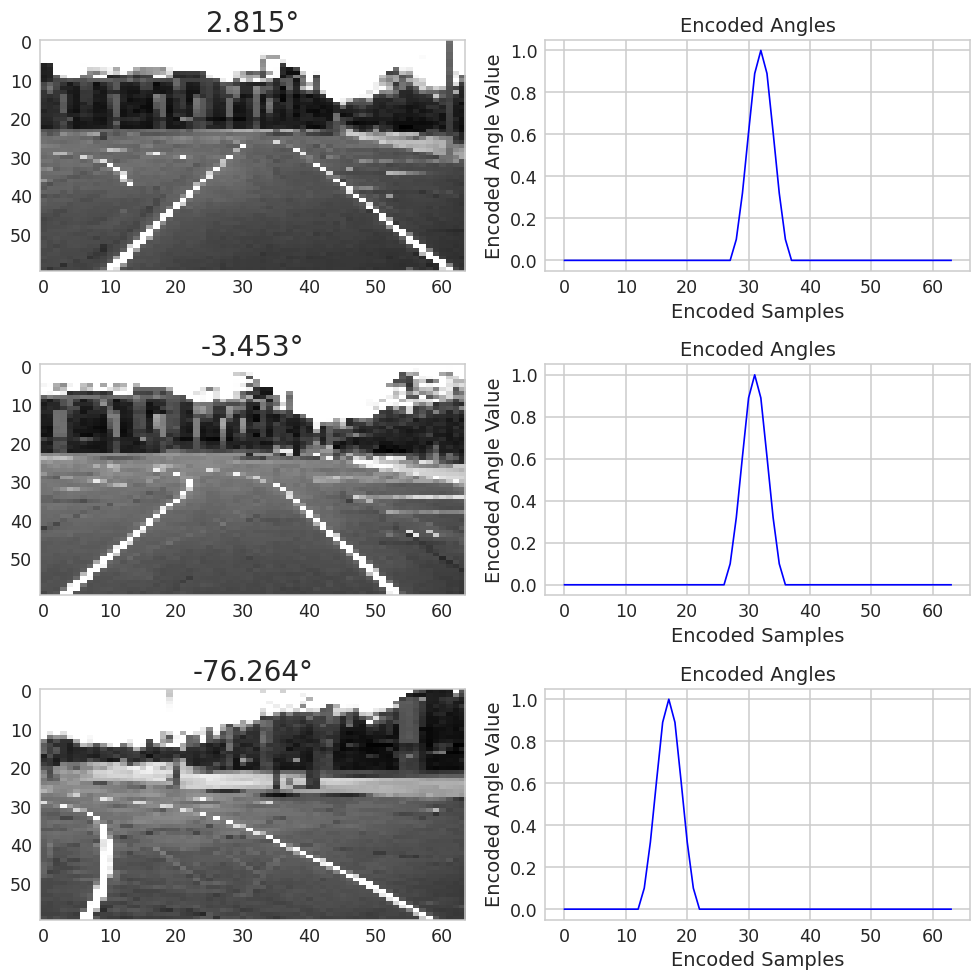

In [ ]:
fig = plt.figure(0, figsize=(10, 10))
for i in range(3):
    ax1 = fig.add_subplot(3, 2, 2 * i + 1)
    img = data['images'][i * 100, :, :]
    ax1.imshow(img, aspect='auto', cmap='gray')
    ax1.grid(False)
    angle = round(data['angles'][i * 100], 3)
    ax1.set_title(f'{angle}°', fontsize=20)
    ax2 = fig.add_subplot(3, 2, 2 * i + 2)
    encoded_angles = data['encoded_angles'][i * 100, :]
    ax2.plot(encoded_angles, color='blue')
    ax2.set_title('Encoded Angles', fontsize=14)
    ax2.set_xlabel('Encoded Samples', fontsize=14)
    ax2.set_ylabel('Encoded Angle Value', fontsize=14)
plt.tight_layout()
plt.show()

machine learning solution....
Test train split!
We'll use ~3 laps (1500) images for training, and 1 lap (500) images for testing

In [ ]:
#Test-train split
training_indices = np.arange(1500)
testing_indices = np.arange(1500, 2000)
images_training = data['images'][training_indices, :, :] / 255.0
angles_training = data['encoded_angles'][training_indices, :]
images_testing = data['images'][testing_indices, :, :] / 255.0
angles_testing = data['encoded_angles'][testing_indices, :]


Extract and normalize testing images and angles#
Extract and normalize training images and angles

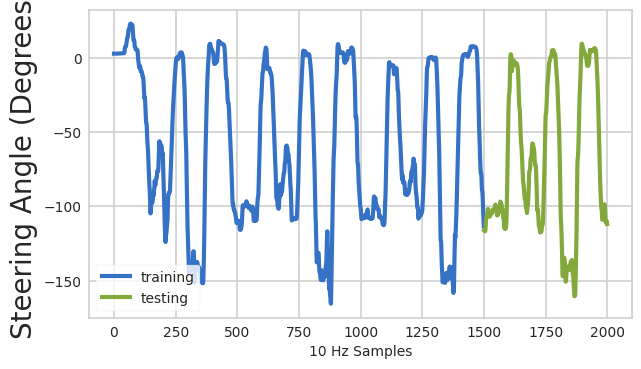

In [ ]:
fig = plt.figure(0, figsize=(7, 4))
# Plot training and testing angles with a linewidth of 3
plt.plot(training_indices, data['angles'][:][training_indices], linewidth=3)
plt.plot(testing_indices, data['angles'][:][testing_indices], linewidth=3)
plt.ylabel('Steering Angle (Degrees)', fontsize=20)
plt.xlabel('10 Hz Samples', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(['training', 'testing'], fontsize=10)
plt.show()

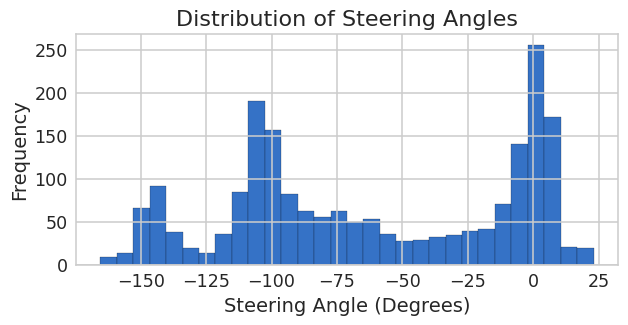

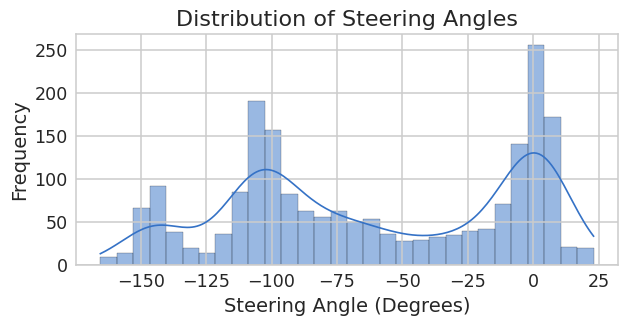

In [ ]:
import seaborn as sns
# Extract the steering angles
angles = data['angles'][:]
# Data Distribution Visualization
plt.figure(figsize=(7, 3))
plt.hist(angles, bins=30, edgecolor='black')
plt.xlabel('Steering Angle (Degrees)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Steering Angles', fontsize=16)
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 3))
sns.histplot(angles, bins=30, kde=True, edgecolor='black')
plt.xlabel('Steering Angle (Degrees)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Steering Angles', fontsize=16)
plt.grid(True)
plt.show()

training, the architecture

In [ ]:
import tensorflow as tf
import numpy as np

# Hyper Parameters
learning_rate = 1e-4
num_iterations = 5000
batch_size = 64  # Adjust batch size based on your dataset and resources

# How many bins is our data encoded into:
bins = angles_training.shape[1]
# Setup tf input layers for images and angles
im = tf.keras.Input(shape=(60, 64), dtype=tf.float32)
ang = tf.keras.Input(shape=(bins,), dtype=tf.float32)
# Reshape input images into vectors
im_reshaped = tf.keras.layers.Flatten()(im)

a1 = tf.keras.layers.Dense(4, activation=tf.nn.sigmoid)(im_reshaped)
yhat = tf.keras.layers.Dense(bins)(a1)

# Create a model
model = tf.keras.Model(inputs=im, outputs=yhat)
# Loss function
loss = tf.losses.mean_squared_error(ang, yhat)
# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

# Training loop
for iteration in range(num_iterations):
    # Sample a batch from your training data (images and angles)
    batch_indices = np.random.choice(len(angles_training), size=batch_size, replace=False)
    batch_images = images_training[batch_indices]
    batch_angles = angles_training[batch_indices]

    with tf.GradientTape() as tape:
        predictions = model(batch_images)
        iteration_loss = tf.reduce_mean(tf.square(predictions - batch_angles))

    gradients = tape.gradient(iteration_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {iteration_loss.numpy()}")

# Save the trained model
model.save('/content/drive/MyDrive/Work - Project/saved_model')
print("Model saved")


Iteration 0, Loss: 0.0731065645813942
Iteration 100, Loss: 0.051184773445129395
Iteration 200, Loss: 0.048291586339473724
Iteration 300, Loss: 0.0472693145275116
Iteration 400, Loss: 0.04653586447238922
Iteration 500, Loss: 0.044938668608665466
Iteration 600, Loss: 0.04226485267281532
Iteration 700, Loss: 0.04172002524137497
Iteration 800, Loss: 0.0409245528280735
Iteration 900, Loss: 0.04042203724384308
Iteration 1000, Loss: 0.03711382672190666
Iteration 1100, Loss: 0.038468971848487854
Iteration 1200, Loss: 0.03666183352470398
Iteration 1300, Loss: 0.035260170698165894
Iteration 1400, Loss: 0.03559008240699768
Iteration 1500, Loss: 0.03433272987604141
Iteration 1600, Loss: 0.031216945499181747
Iteration 1700, Loss: 0.030494365841150284
Iteration 1800, Loss: 0.02986377291381359
Iteration 1900, Loss: 0.029785707592964172
Iteration 2000, Loss: 0.027469515800476074
Iteration 2100, Loss: 0.025853902101516724
Iteration 2200, Loss: 0.023471279069781303
Iteration 2300, Loss: 0.02376779913902

Model saved


In [ ]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Work - Project/saved_model')
loaded_model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Evaluate the model on the testing data
test_loss = loaded_model.evaluate(images_testing, angles_testing, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions using the loaded model
predictions = loaded_model.predict(images_testing)

# Print some example predictions and actual angles
for i in range(10):
    print(f"Prediction: {predictions[i]}, Actual: {angles_testing[i]}")


Test Loss: 0.01753893494606018
16/16 [==============================] - 0s 3ms/step
Prediction: [ 6.12546057e-02  9.14629102e-02  9.73063707e-02  9.07197595e-02
  9.60524529e-02  1.15706414e-01  9.68686491e-02  1.48241550e-01
  2.63088256e-01  3.36938322e-01  4.81305480e-01  5.42651832e-01
  6.53738856e-01  6.12390757e-01  5.24196625e-01  3.64100575e-01
  2.25605965e-01  1.00229718e-01  5.35164624e-02  5.65399006e-02
  6.59232363e-02 -6.59179688e-03  5.91344088e-02  5.32393232e-02
  1.29339755e-01  7.84756988e-02  1.09108649e-01  7.66378343e-02
  1.08104922e-01  6.54745847e-02 -4.33635339e-02 -3.84453833e-02
 -7.92253762e-02 -1.54576883e-01 -7.03947991e-02 -6.35499433e-02
 -3.02566215e-03 -1.22431936e-02 -8.75026267e-03 -1.45836081e-03
  4.51468979e-04 -3.09759937e-03  5.24616567e-03  6.55480244e-06
 -2.08558654e-03 -1.61020350e-10 -2.89455778e-03  8.30390025e-04
  3.23065236e-04  3.24735680e-04  3.69889941e-03 -3.38010723e-05
  8.05112161e-03 -2.46481248e-03  7.94089306e-03 -1.0953738

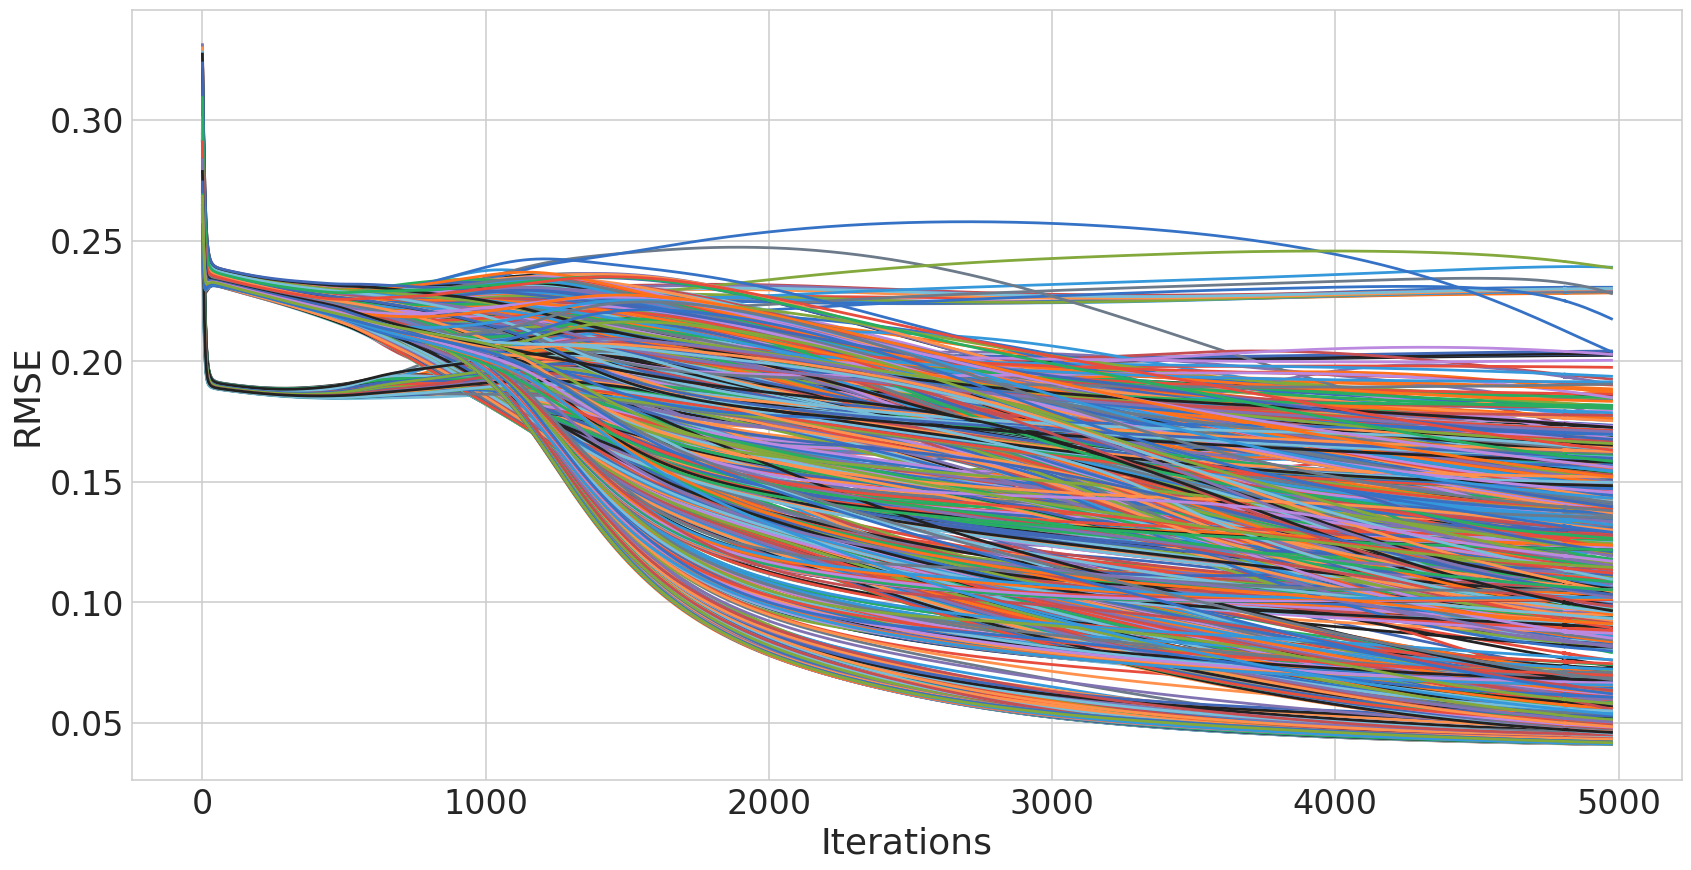

<Figure size 640x560 with 0 Axes>

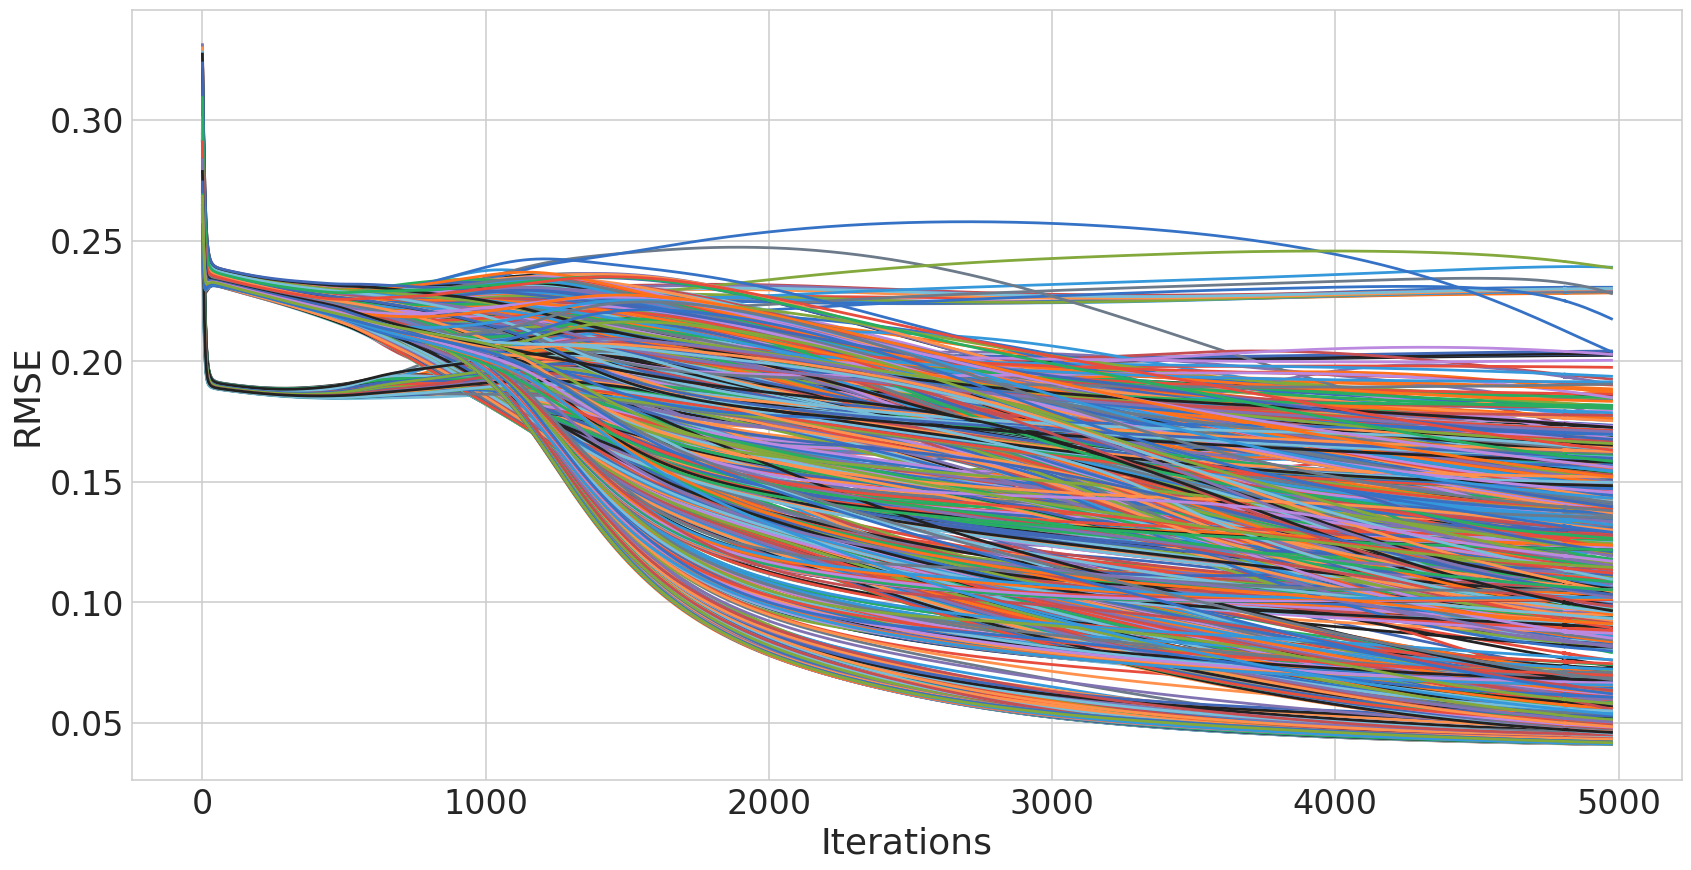

In [ ]:
from IPython import display

# Store errors as we train in a list:
RMSEs = []

# Initialize Tensorflow session:
sess = tf.compat.v1.InteractiveSession()
tf.compat.v1.global_variables_initializer().run()

# And train!
for i in range(num_iterations):
    # Train Step
    sess.run(train_op, feed_dict={im: images_training, ang: angles_training})
    # Measure error
    RMSEs.append(np.sqrt(loss.eval(feed_dict={im: images_training, ang: angles_training})))

    # Visualize as we go!
    if i % 25 == 0:
        plt.clf()
        fig = plt.figure(0, (10, 5))
        ax = fig.add_subplot(111)
        plt.plot(RMSEs, linewidth=2)
        plt.xlabel('Iterations', fontsize=26)
        plt.ylabel('RMSE', fontsize=26)
        ax.xaxis.set_tick_params(labelsize=24)
        ax.yaxis.set_tick_params(labelsize=24)
        display.clear_output(wait=True)
        display.display(fig)


In [ ]:
#Network Predictions on Testing Images:
yhat_array = yhat.eval(feed_dict = {im:images_testing})

#Center values of our prediction bins:
centers = np.linspace(-165, 165, bins)

# Convert probabilistic prediction to a single angle
predicted_angles = []
for i in range(yhat_array.shape[0]):
    # Just pick bin with the largest value:
    predicted_angles.append(centers[np.argmax(yhat_array[i, :])])
    #Fancy weighted average:
    #predicted_angles.append(sum(centers[yhat_array[i, :] > 0.3]*yhat_array[i, \
    #                    yhat_array[i, :] > 0.3])/sum(yhat_array[i, yhat_array[i, :] > 0.3]))

<ipython-input-34-44c6c0581445>:18: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(16)


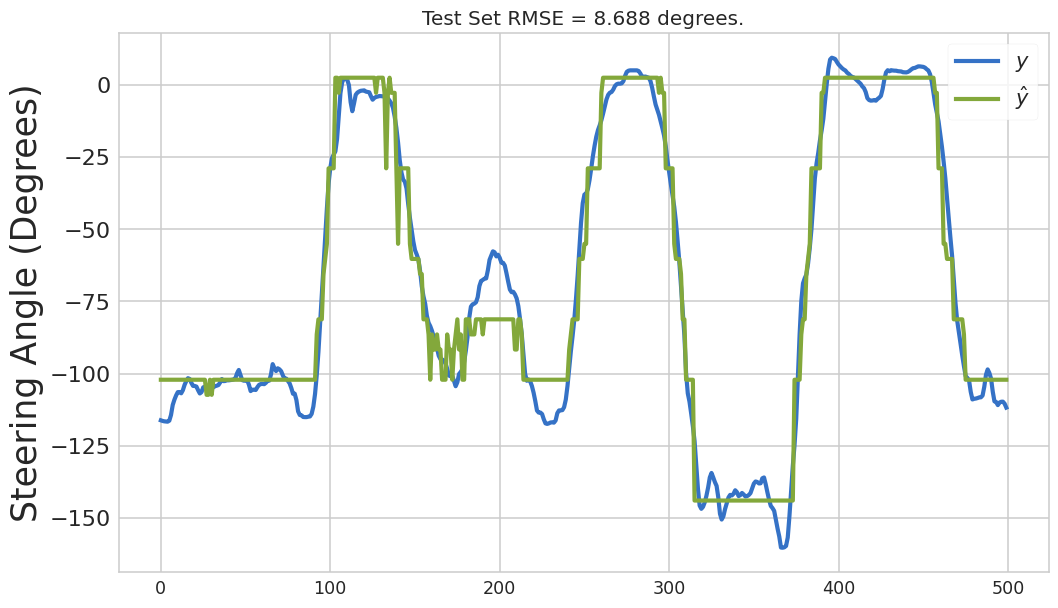

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the test set angles and predicted angles
fig = plt.figure(0, figsize=(12, 7))
plt.plot(data['angles'][:][testing_indices], linewidth=3)
plt.plot(predicted_angles, linewidth=3)

# Set labels and title
plt.ylabel('Steering Angle (Degrees)', fontsize=25)
plt.title('Test Set RMSE = ' + str(round(np.sqrt(np.mean((predicted_angles - data['angles'][:][testing_indices])**2)), 3)) + ' degrees.')

# Add legend
plt.legend(['$y$', '$\hat{y}$'], fontsize=15)

# Increase y-axis tick label font size
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Show the plot
plt.show()


DONE !!